# **FIT1043 Introduction to Data Science**
### **Assignment 1**

Kin Jian Xin

31165087

### **Introduction**

In a large and scattered dataset, it is hard for the naked human eye to detect patterns hidden in the dataset. Without being able to detect patterns and groups in a dataset render us unable to predict and classify further data into respective categories. The goal of this report is to enable the use of machine learning algorithms and assist us in clustering and classifying data of vehicles that are sold in the US in 2000.

### **Importing the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

### **Code for reading files**

Start by reading the .csv file and storing it into df

In [2]:
df = pd.read_csv("FIT1043-vehicle-classifier.csv")
df.shape

(156, 14)

We can see that we have 156 rows of entires and 14 fields for each row of entry, which is a small size of dataset but should be enough to conduct machine learning.

The first and second field of each record contains the name of the manufacturer and its model, together they make a unique identifier for each record. We are also given the dimensions of the car and its type in addition to other statistics, which might be useful to our machine learning later.

In [3]:
df.loc[15]['Curb_weight']

nan

It is noted that some of the records are missing important fields such as Curb_weight and Fuel_efficiency, which might skew analysation. Thus we have collected data from the internet to fill in the missing data to maintain our data integrity.

In [4]:
df.at[15, 'Curb_weight'] = 4.001
df.at[37, 'Fuel_efficiency'] = 21
df.at[108, 'Fuel_efficiency'] = 20

Most of the vehicles are missing out the Vehicle_alt_class field too. So we decided to fill the Vehicle_alt_class column by just copying the value of their main class into the column

In [5]:
df=df.fillna(0)
df.loc[df.Vehicle_alt_class ==0, 'Vehicle_alt_class'] = df['Vehicle_class']

There are also some error in the model type of some cars due to functionality problems in Microsoft Excel.

In [6]:
df.loc[126]['Model']

'05-Sep'

In [7]:
df.at[126, 'Model'] = '9-3'
df.at[127, 'Model'] = '9-5'

We then can combine some fields to form more new meaningful fields to our report.

In [8]:
df['Output_Per_EngineCapacity'] = df['Horsepower']/df['Engine_size (litres)']
df['Rough_Volume(m^3)']=df['Width']/39.37*df['Height']/39.37*df['Length']/39.37

By calculating output per engine capacity of each type of car, we get an idea of the engine efficiency of respective cars. On the other hand, calculating the product of the car's dimension gives us only the rough size of the car (in metres cubed) due to the design of all cars are different.

In [9]:
df['Rough_Volume(m^3)'].describe()

count    156.000000
mean      13.013284
std        2.666994
min        8.490601
25%       11.071403
50%       12.367366
75%       13.974735
max       22.648839
Name: Rough_Volume(m^3), dtype: float64

From the 5 number summary of Rough_Volume, we can see that in the 156 cars, there are a big variety of sizes. Ranging from the smallest at 8m^3 to the biggest at 22m^3. But the range between the median and the upper and lower quatiles are small, meaning that most of the cars fall in the size of around 12m^3.

The graph below shows a visualisation of data through a histogram.

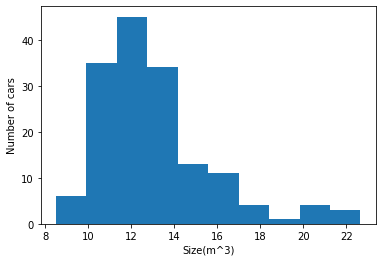

In [10]:
plt.hist(df['Rough_Volume(m^3)'])
plt.xlabel("Size(m^3)")
plt.ylabel("Number of cars")
plt.show()

___

### **Clustering**

Before starting the clustering process, we remove the columns 'Vehicle_class', 'Vehicle_alt_class', 'US_vehicle_type' since we do not need them for the clustering process.
We do store a copy of the dataframe with the columns for us to restore the columns later.

In [11]:
dftemp=df

In [12]:
df=df.drop(['Vehicle_class','Vehicle_alt_class','US_vehicle_type'], 1)

After this, we can start our clustering process, which is a type of unsupervised machine learning. That is to detect obscure patterns or trends in a dataset without labels while under little to no supervision from humans.

In this clustering process, we are grouping each record based on their Output_Per_EngineCapacity and their Fuel_efficiency. Because there are no direct obvious relationship between the two fields, we might able to identify potential patterns or hidden relationship between the fields. From the groupings, we are able to deduce the type of the vehicle(economy/high-end) and predict the main goal or purpose the vehicle is trying to achieve when it is produced by the manufacturer(efficiency-focused/performance-focused)

First we plot our Output_Per_EngineCapacity column against Fuel_efficiency column in scatter plot normally in order for us to have an idea about how the graph looks like.

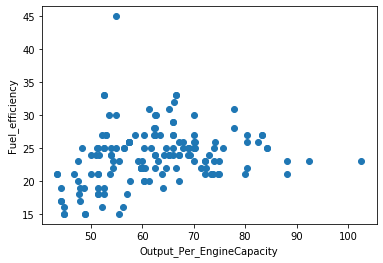

In [13]:
plt.scatter(x=df['Output_Per_EngineCapacity'],y=df['Fuel_efficiency'])
plt.xlabel('Output_Per_EngineCapacity')
plt.ylabel('Fuel_efficiency')
plt.show()


From the graph it seems like in points are quite scattered but most of the points fall in the left half of the graph and near the bottom area.

___

We start by clustering our input into two clusters.

In [14]:
kmeans=KMeans(n_clusters=2).fit(df[['Output_Per_EngineCapacity','Fuel_efficiency']])

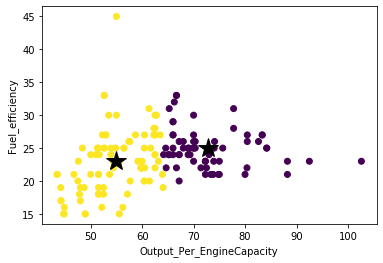

In [15]:
plt.scatter(x=df['Output_Per_EngineCapacity'],y=df['Fuel_efficiency'],c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('Output_Per_EngineCapacity')
plt.ylabel('Fuel_efficiency')
plt.show()

From the graph we can see that after clustering, the data has been spilt into two distinct clusters, one on the left and the other one on the right. The cluster on the left shows vehicles with low Output_Per_EngineCapacity, meaning the vehicles are more toward practical usage or small in size whereas the right cluster shows vehicle with medium to high Output_Per_EngineCapacity, implying the vehicles are either more performance-forcused or large  in size so it requires more output from the engine.

___

After this we cluster the input into 5 different clusters to potentially identify more groups in the dataset.

In [16]:
kmeans=KMeans(n_clusters=5).fit(df[['Output_Per_EngineCapacity','Fuel_efficiency']])

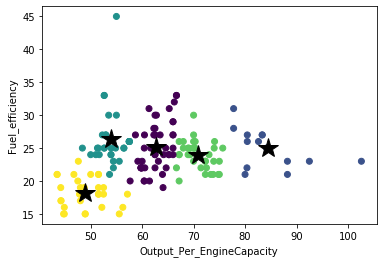

In [17]:
plt.scatter(x=df['Output_Per_EngineCapacity'],y=df['Fuel_efficiency'],c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=20)
plt.xlabel('Output_Per_EngineCapacity')
plt.ylabel('Fuel_efficiency')
plt.show()

After the clustering process, we can see that the green cluster shows the type of vehicles which are potentially low-end in the vehicle industry as they are inefficient in terms of both output and fuel usage. Next onto the blue cluster, these might be the economy type of vehicle where they have excellent fuel efficiency but low to mediocre output, suitable for average civilian. The yellow cluster and teal cluster are quite similar in terms of the overall position in the vehicle industry, they both have middle-of-the-road fuel efficiency and moderate engine output, with the latter one having an edge over the former one. These types of vehicles are usually vehicles that needs to find a balance between engine output and fuel usage for example: Passenger bus or industrial trucks. Lastly the purple cluster are the vehicles that requires high output from the engine such as container trucks or sports car. These vehicles are usually not required by an average civilian thus there is a smaller about of data points in the cluster.

___

Finally, we will cluster the input into 7 different clusters.

In [18]:
kmeans=KMeans(n_clusters=7).fit(df[['Output_Per_EngineCapacity','Fuel_efficiency']])

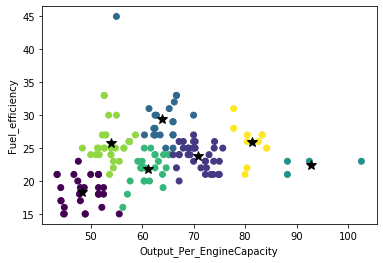

In [19]:
plt.scatter(x=df['Output_Per_EngineCapacity'],y=df['Fuel_efficiency'],c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=10)
plt.xlabel('Output_Per_EngineCapacity')
plt.ylabel('Fuel_efficiency')
plt.show()

In this clustering process, we can see a few groups remained the same with the previous clustering. Notably the teal group, light purple group and the blue group. Meanwhile the rest are groups being spilt apart further into two different groups. We can see that both green and light green groups have similar engine output but the latter ones are much superior in terms of fuel efficiency, which makes it a great choice for an average civilian who is looking to purchase a car. On the other hand, comparing the dark purple and the yellow group, we can see that the dark purple group are more likely the high-end cars that are focused in performance, primarily sport cars while the yellow groups are vehicles that requires high output from the engine but still has to compromise for the fuel efficiency such as various sizes of cargo transportation vehicle or buses. 

___

In doubt with our previous input for clustering, we have decided to try out other inputs and run the clustering process to see if we are able to produce a better clustering results.

In this clustering process, we are grouping each record based on their Engine_size (litres) and their Fuel_efficiency. Normally, larger engine size means higher fuel consumption as there will be more space for the engine to burn more fuel. But we might be able to find other relation between the two fields through clustering process and grouping data together.

We will spilt the data into 5 different clusters as 5 clusters are the most suitable way to detect a pattern.

In [20]:
kmeans=KMeans(n_clusters=5).fit(df[['Engine_size (litres)','Fuel_efficiency']])

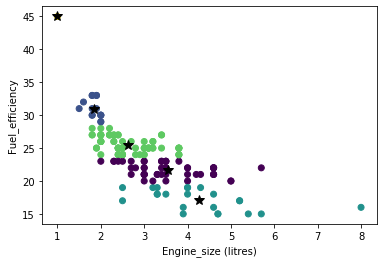

In [21]:
plt.scatter(x=df['Engine_size (litres)'],y=df['Fuel_efficiency'],c=kmeans.labels_)
plt.plot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],'k*',markersize=10)
plt.xlabel('Engine_size (litres)')
plt.ylabel('Fuel_efficiency')
plt.show()

As we predicted, the direct relationship between the two fields are the higher the engine size, the higher the fuel consumption, thus the lower the fuel efficiency. The data are grouped by their respective fuel efficiency making us easier to see the relation between the two fields.
Selecting input with direct relationship like these two provide little to no help to our research on using machine learning algorithm to identify obscure patterns the in dataset. So we can deduce that using Output_Per_EngineCapacity and Fuel_efficiency would be a much better choice.

___

### **Classfication**

In this report, we are going to conduct classification with different means, notably binary and multi-class classification. In binary classification, there are only two classes and we predict which class our sample will fall into after forming our model. Whereas in multi-class classification, rather than predicting which of the two class our sample will fall in, we will have to predict our sample into more than two classes.

Classification is a type of supervised machine learning where the machine is given a set of input data used for training and forming a suitable model used for prediction on the labelled data. After that, the machine is given a test data to test its predictive power based on number of successful and failed prediction.

Before starting the classification process, we have to restore the previously removed columns.

In [22]:
df=dftemp

In the following classifications, we have spilt our dataset into training data and testing data with training data taking up to 75% of the total data and testing data having the rest to validate our model's predictive power.

First we are conducting a binary classification using the decision tree algorithm, where the labelled data is the US_vehicle_type

In [23]:
#Declaring input and labelled data
X = df.iloc[:, [5,13]].values
y = df.iloc[:, 4].values
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
#Feature scaring and normalising our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Finally forming and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  1],
       [ 3, 26]], dtype=int64)

From the confusion matrix, we can see that  
  
for the first entitiy,   
the recall is 9x100/(9+3)=75%  
the precision is 9x100/(9+1)=90%  
  
for the second entity,  
the recall is 26x100/(26+1)=96%  
the precision is 26x100/(26+3)=90%  
  
And the total accuracy is (9+26)x100/(9+26+1+3)=90%

After this, we output our predicted results in a CSV file.

In [24]:
output=pd.DataFrame(y_pred)
output.index = np.arange(1, len(output)+1)
output.columns=['predicted output']
output.to_csv("3(c)output.csv")

___


After this we are conducting a multi-class classification using the decision tree algorithm, where the labelled data is the Vehicle_class.

In [25]:
#Declaring input and labelled data
X = df.iloc[:, [5,13]].values
y = df.iloc[:, 2].values
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
#Feature scaring and normalising our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Finally forming and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  0,  0,  5,  0],
       [ 2,  1,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 5,  1,  1, 15,  0],
       [ 1,  0,  1,  0,  1]], dtype=int64)

From the confusion matrix, we can see that  
  
for the first entitiy,   
the recall is 2x100/(2+2+5+1)=20%  
the precision is 2x100/(2+5)=29%  
  
for the second entity,  
the recall is 1x100/(1+1)=50%  
the precision is 1x100/(1+2)=33%  
  
for the third entity,  
the recall is 4x100/(4+1+1)=67%  
the precision is 4x100/(4)=100%  
  
for the fourth entity,  
the recall is 15x100/(15+5)=75%  
the precision is 15x100/(15+5+1+1)=68%  
  
for the fifth entity,  
the recall is 1x100/(1)=100%  
the precision is 1x100/(1+1+1)=33%  
  
And the total accuracy is (2+1+4+15+1)x100/(2+2+5+1+1+1+4+1+1+5+15+1)=59%

After this, we output our predicted results in a CSV file.

In [26]:
output=pd.DataFrame(y_pred)
output.index = np.arange(1, len(output)+1)
output.columns=['predicted output']
output.to_csv("3(d)output.csv")

___



Lastly, we are conducting another multi-class classification with the Vehicle_alt_class as the label.

In [27]:
#Declaring input and labelled data
X = df.iloc[:, [5,13]].values
y = df.iloc[:, 3].values
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
#Feature scaring and normalising our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Finally forming and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0],
       [ 1,  1,  1,  1, 16,  1,  0],
       [ 2,  0,  0,  0,  3,  0,  0],
       [ 2,  0,  0,  1,  0,  0,  0]], dtype=int64)

From the confusion matrix, we can see that  
  
for the first entitiy,   
the recall is 0x100/(1+2+2)=0%  
the precision is 0x100/(2)=0%  
  
for the second entity,  
the recall is 1x100/(1+1)=50%  
the precision is 1x100/(1)=100%  
  
for the third entity,  
the recall is 3x100/(3+1)=75%  
the precision is 3x100/(3)=100%  
  
for the fourth entity,  
the recall is 4x100/(4+1)=80%  
the precision is 4x100/(4)=100%  
  
for the fifth entity,  
the recall is 16x100/(16+2+3)=76%  
the precision is 16x100/(16+1+1+1+1+1)=76%  
  
for the sixth entity,  
the recall is 0x100/(1)=0%  
the precision is 0x100/(2+3)=0%  
  
for the seventh entity,  
the recall is not able to calculate since there are no data in this field.   
the precision is 0x100/(2+3)=0%  
  
And the total accuracy is (1+3+4+16)x100/(39)=61%

After this, we output our predicted results in a CSV file.

In [28]:
output=pd.DataFrame(y_pred)
output.index = np.arange(1, len(output)+1)
output.columns=['predicted output']
output.to_csv("3(e)output.csv")

___



### **Conclusion**

Concluding the report, we are going to re-do the multi-class classification using the Random Forest algorithm instead of the decision tree algorithm, where the labelled data is the Vehicle_class.

In [29]:
#Declaring input and labelled data
X = df.iloc[:, [5,13]].values
y = df.iloc[:, 2].values
#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
#Feature scaring and normalising our data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 20,criterion = 'entropy',random_state = 0)
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Finally forming and displaying the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 2,  0,  0,  5,  0],
       [ 1,  1,  0,  1,  0],
       [ 0,  0,  4,  0,  0],
       [ 1,  1,  1, 19,  0],
       [ 1,  0,  2,  0,  0]], dtype=int64)

From the confusion matrix, we can see that  
  
for the first entitiy,   
the recall is 2x100/(2+1+1+1)=40%  
the precision is 2x100/(2+5)=29%  
  
for the second entity,  
the recall is 1x100/(1+1)=50%  
the precision is 1x100/(1+1+1)=33%  
  
for the third entity,  
the recall is 4x100/(4+1+2)=57%  
the precision is 4x100/(4)=100%  
  
for the fourth entity,  
the recall is 19x100/(19+5+1)=76%  
the precision is 19x100/(19+1+1+1)=86%  
  
for the fifth entity,  
the recall is not able to calculate since there are no data in this field.   
the precision is 0x100/(2+1)=0%  
  
And the total accuracy is (2+1+4+19)x100/(2+1+1+1+1+1+4+1+2+5+1+19)=67%

After comparing the confusion matrix evaluation from the two, we are able to identify that the Random forest algorithm outperforms the decision tree algorithm in various field, also being up to 8% more accurate overall than the decision tree algorithm.

After conducting various machine learning processes on the dataset, we are able to show that in the field of data science, it is hard to only analyse data using the naked eye and human-level analysis. By introducing the help of Artificial intelligence in the form of machine learning algorithms, we are able to identify obscure patterns in the dataset that are previously unseen.
Furthermore, with the help of machine learning algorithms, we are able to effectively predict whether a sample falls into a particular class based on various fields of data. In conclusion, artificial intelligence is a crucial part of data analysis and with further development in the future, they are able to provide even more consistent and accurate predictions.